In [95]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [96]:
from itertools import product

def generate_monomials(variables, m):
    monomials = []
    for degree in range(m + 1):
        for powers in product(range(degree + 1), repeat=len(variables)):
            if sum(powers) == degree:
                monomial_parts = [variables[i] for i, power in enumerate(powers) for _ in range(power)]
                monomial = ' * '.join(monomial_parts) if monomial_parts else '1'
                monomials.append(monomial)
    
    return monomials

result = generate_monomials(['x', 'y'], 3)
print(result)


['1', 'y', 'x', 'y * y', 'x * y', 'x * x', 'y * y * y', 'x * y * y', 'x * x * y', 'x * x * x']


[(1.0000671345958867, 0.00018750588726928726), (0.9785853744830413, 0.20808061981823184), (0.9139464977648967, 0.40650465958502713), (0.8090413747736285, 0.5883608001994739), (0.6681859662286197, 0.7438534655582477), (0.500536700339316, 0.8660891398559557), (0.3088653082766834, 0.9512645911008153), (0.10506721256237783, 0.9948299372567521), (-0.10537232349802714, 0.993958060101359), (-0.3082097702043996, 0.9503398154648206), (-0.4990171037945851, 0.8658977345613357), (-0.6693096900862764, 0.7431076152327859), (-0.8095449608275427, 0.587316913092886), (-0.912871140597334, 0.4058325988445387), (-0.9775366761609017, 0.20768183135787482), (-1.0000066024602516, 0.00021993214470715847), (-0.9777578571389254, -0.20778832200613237), (-0.9134049900460071, -0.40753755563264893), (-0.8093335508336581, -0.5875391462977996), (-0.6685323526906801, -0.7423196908831191), (-0.4992823771399705, -0.8666751200294005), (-0.3097926844231229, -0.951565753821903), (-0.1045273246788415, -0.9948970784957017), (

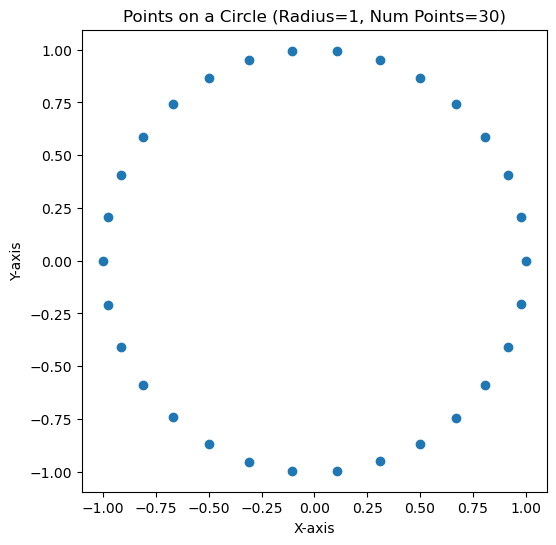

In [97]:
def linspace_circle(radius, num_points):
    points = []
    for i in range(num_points):
        angle = 2 * math.pi * i / num_points  
        x = radius * math.cos(angle)  
        y = radius * math.sin(angle)  
        
        noise_x = random.uniform(-0.001, 0.001)  # Adjust the range as needed
        noise_y = random.uniform(-0.001, 0.001)  # Adjust the range as needed

        x += noise_x
        y += noise_y
        
        points.append((x, y))  
    return points

circle_radius = 1
num_points = 30

circle_points = linspace_circle(circle_radius, num_points)
print(circle_points)

x_coords, y_coords = zip(*circle_points)

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords)
plt.title(f'Points on a Circle (Radius={circle_radius}, Num Points={num_points})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')  
plt.show()

In [113]:
def multivariate_vandermonde_matrix(data, degree):
    variables = [f'x{i}' for i in range(degree)]
    monomials = generate_monomials(variables, degree)
    print(monomials)
    vand = []
    for d in data:
        vals = {f'x{i}':d[i] for i in range(len(d))}
        vand.append([eval(monomials[i], vals) for i in range(len(monomials))])
        
    return np.stack(vand)

data = circle_points
degree = 2

A = np.array(multivariate_vandermonde_matrix(data, degree))

def find_kernel(A):
    U, S, Vt = np.linalg.svd(A)
    tolerence = np.finfo(np.float64).eps * np.max(S[0]) * max(A.shape)
    count = np.sum(S < tolerence)
    return Vt[-count:,:]

basis = np.linalg.lstsq(A, np.zeros(A.shape[0]), rcond='warn')
basis
# basis = find_kernel(A.T @ A)
# basis



['1', 'x1', 'x0', 'x1 * x1', 'x0 * x1', 'x0 * x0']


/var/folders/n0/h3s95wpx14jct1m8d4zl29rc0000gn/T/ipykernel_52603/852880827.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  basis = np.linalg.lstsq(A, np.zeros(A.shape[0]))


(array([0., 0., 0., 0., 0., 0.]),
 array([0.]),
 6,
 array([6.70793829e+00, 3.87336329e+00, 3.87214242e+00, 2.73866077e+00,
        1.93599771e+00, 2.74391991e-03]))